In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
import time
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Visualization**

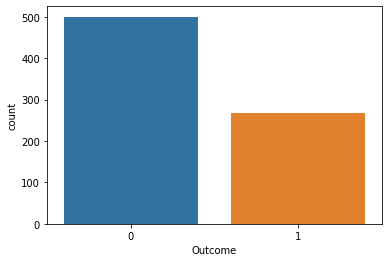

In [ ]:
# target colum "Outcome" count plot to know how many of them are diabetic and how people are not diabetic

plt1=sns.countplot(x='Outcome', data=data)
plt.show()

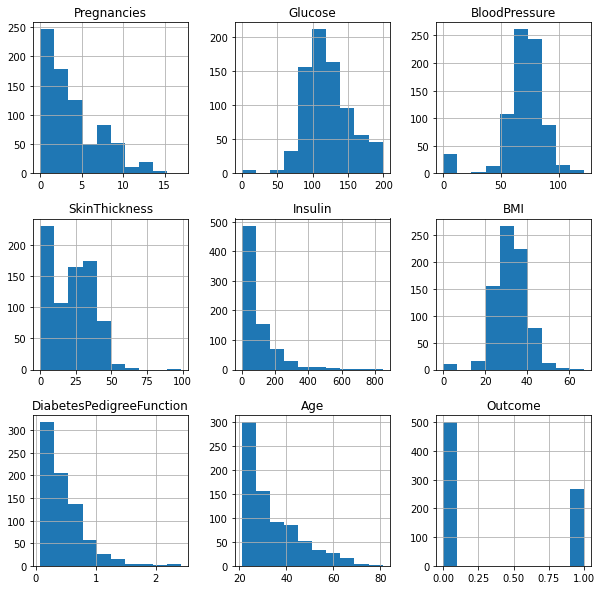

In [ ]:
plt2= data.hist(bins = 10,figsize=(10,10))
plt.show()

<Axes: >

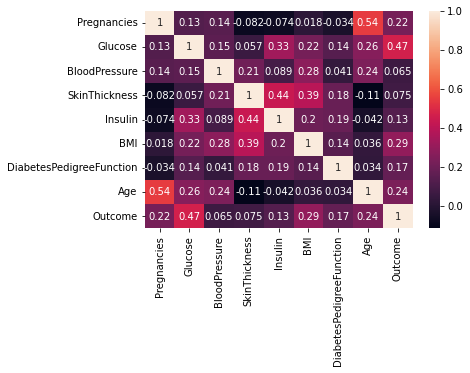

In [ ]:
plt3_corrmat = data.corr()
sns.heatmap(plt3_corrmat, annot = True) #glucose,age,BMI are highly correlated with outcome and BloodPressure,Insulin,SkinThickness are less correlated so we can drop them

**preprocessing**

In [ ]:
data = data.drop(['BloodPressure','Insulin','SkinThickness'],axis = 'columns')

In [ ]:
data.head(5)

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1


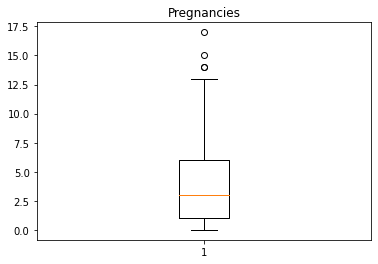

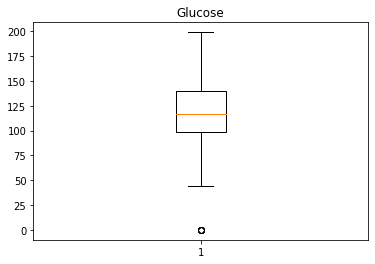

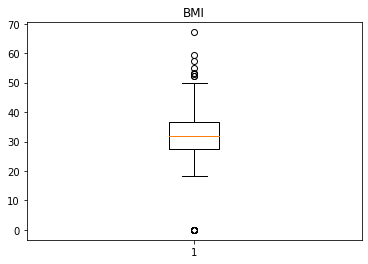

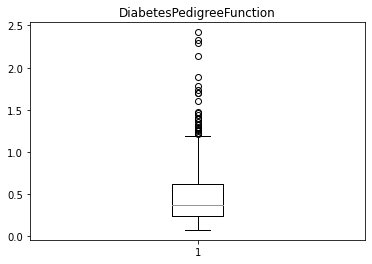

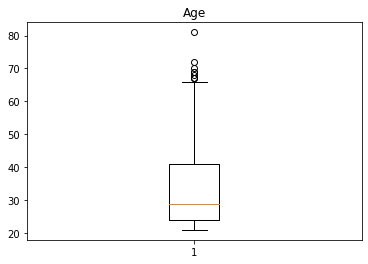

In [ ]:
# handling outliers plotting boxplots for each column

cols=data.columns.drop(['Outcome'])

for col in cols:
  plt.figure()
  plt.boxplot(data[col])
  plt.title(col)
  plt.show()

In [ ]:
# filling outliers by using quartile() function

# Loop through each column and fill outliers

for col in cols:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  data[col] = data[col].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x )

In [ ]:
data.shape

(768, 6)

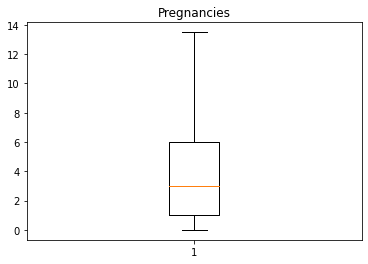

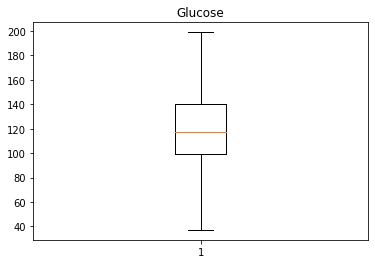

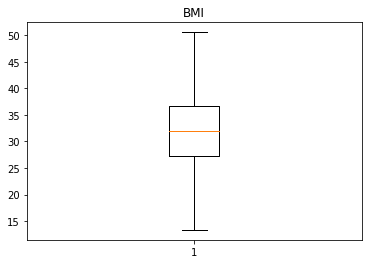

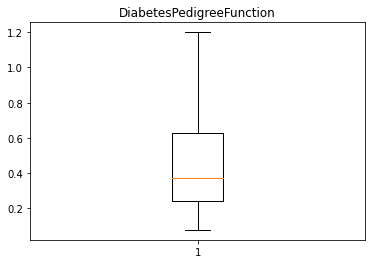

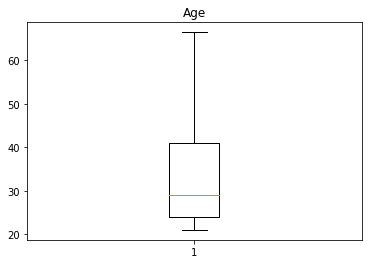

In [ ]:
# plotting boxplots after filling the outliers 

for col in cols:
  plt.figure()
  plt.boxplot(data[col])
  plt.title(col)
  plt.show()

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

**Model Building**

In [ ]:
# defining X and y & split the dataset

X = data[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = data['Outcome']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state= 42)

In [ ]:
# applying the standardscaler to fit the training data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
start_time = time.time()

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth = 5)

In [ ]:
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
end_time = time.time()

execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds ")

Execution time: 0.04 seconds 


In [ ]:
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
y_pred_train = model.predict(X_train_scaled)
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
y_pred_test = model.predict(X_test_scaled)
y_pred_test


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
def evaluate_model(act, pred):
  from sklearn.metrics import confusion_matrix, accuracy_score,\
  recall_score, precision_score

  print("Confusion Matrix \n", confusion_matrix(act, pred))
  print("Accuracy :", accuracy_score(act, pred))
  print("Recall :", recall_score(act, pred))
  print("Precision :", precision_score(act, pred))

In [ ]:
print("Train")
evaluate_model(y_train, y_pred_train)
print("Test")
evaluate_model(y_test, y_pred_test)

Train
Confusion Matrix 
 [[360  41]
 [ 61 152]]
Accuracy : 0.8338762214983714
Recall : 0.7136150234741784
Precision : 0.7875647668393783
Test
Confusion Matrix 
 [[84 15]
 [19 36]]
Accuracy : 0.7792207792207793
Recall : 0.6545454545454545
Precision : 0.7058823529411765


In [ ]:
start_time = time.time()

In [ ]:
# defining the parameter grid to search

param_grid = {'max_depth':[2,4,5,6,8,10]}

In [ ]:
# performing a grid search using 5-fold cross validation

grid_search = GridSearchCV(model, param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': [2, 4, 5, 6, 8, 10]})

In [ ]:
# printing  the best parameter and the accuracy score

print("best parameter:",grid_search.best_params_)
print("Accuracy Score:",grid_search.best_score_)

best parameter: {'max_depth': 2}
Accuracy Score: 0.7573637211781954


In [ ]:
# defining the boosting technique


gb = GradientBoostingClassifier(n_estimators = 100, learning_rate= 0.1,max_depth = 5,random_state = 42)


In [ ]:
# fitting and evaluating the Gradient Boosting classifier

gb.fit(X_train_scaled , y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [ ]:
end_time = time.time()

execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds ")

Execution time: 138.93 seconds 


In [ ]:
print("Gradient Boosting Classifier Accuracy:", gb.score(X_train_scaled, y_train))

Gradient Boosting Classifier Accuracy: 0.996742671009772


In [ ]:
y_pred_train1 = gb.predict(X_train_scaled)
y_pred_train1

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
y_pred_test1 = gb.predict(X_test_scaled)
y_pred_test1

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
def evaluate_model(act, pred):
  from sklearn.metrics import confusion_matrix, accuracy_score,\
  recall_score, precision_score

  print("Confusion Matrix \n", confusion_matrix(act, pred))
  print("Accuracy :", accuracy_score(act, pred))
  print("Recall :", recall_score(act, pred))
  print("Precision :", precision_score(act, pred))

In [ ]:
print("Train")
evaluate_model(y_train, y_pred_train1)
print("Test")
evaluate_model(y_test, y_pred_test1)

Train
Confusion Matrix 
 [[400   1]
 [  1 212]]
Accuracy : 0.996742671009772
Recall : 0.9953051643192489
Precision : 0.9953051643192489
Test
Confusion Matrix 
 [[79 20]
 [14 41]]
Accuracy : 0.7792207792207793
Recall : 0.7454545454545455
Precision : 0.6721311475409836


In [ ]:
prediction_file = pd.DataFrame({'Outcome':y_pred_test})

In [ ]:
prediction_file.to_csv('predicted_results_as_diabetic_or_not.csv',index=False)